In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

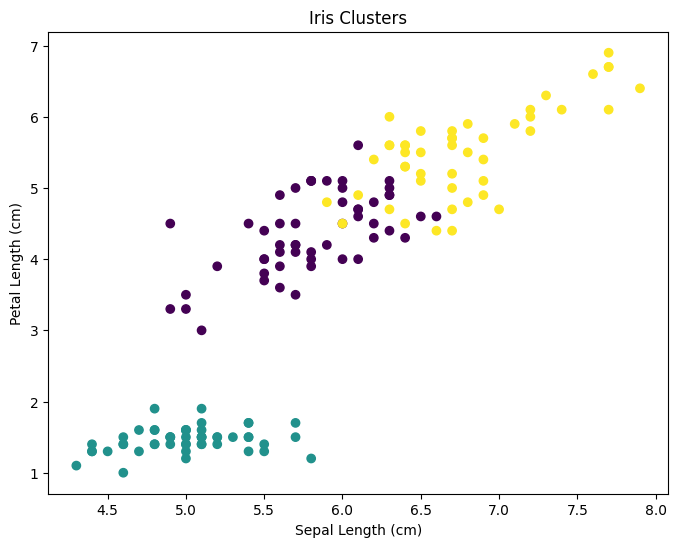

In [9]:

# Load the Iris dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42,n_init=10)

# Fit the model to the data
kmeans.fit(scaled_data)

# Predict the cluster labels
labels = kmeans.predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['sepal_length'], data['petal_length'], c=labels)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Clusters')
plt.show()

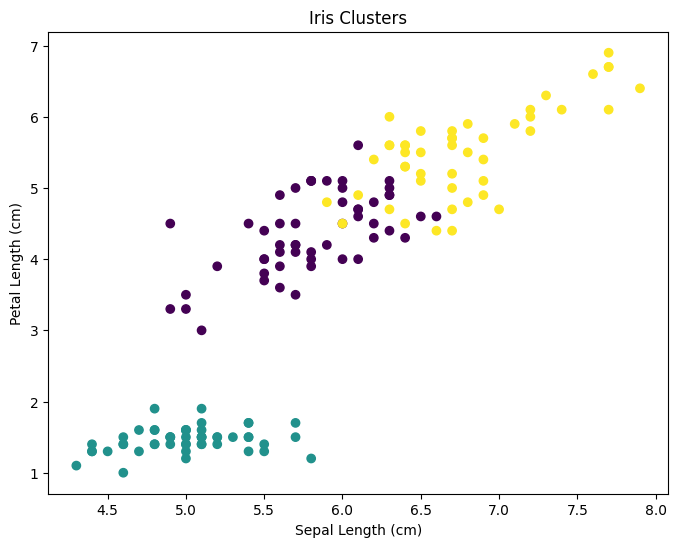

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(data['sepal_length'], data['petal_length'], c=labels)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Iris Clusters')
plt.show()

# ChatGPT

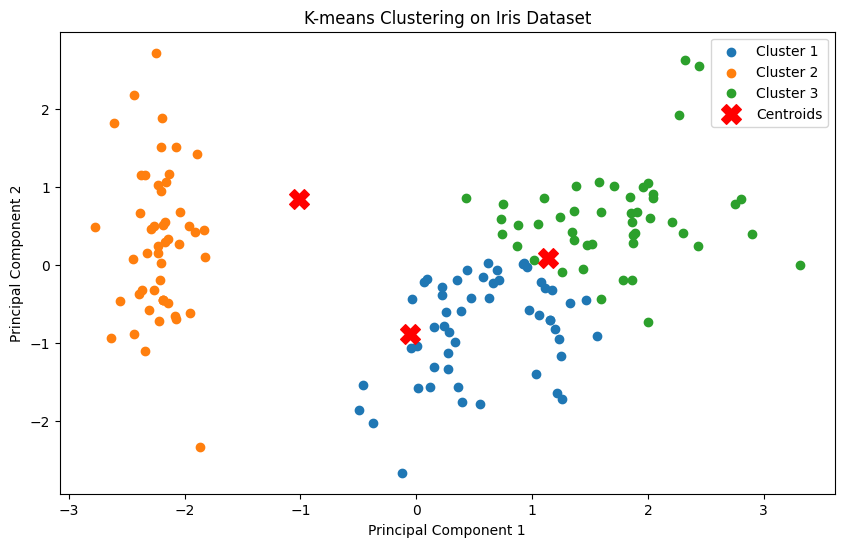

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data = pd.read_csv(url, names=names)

# Separate features (X) and target variable (y)
X = iris_data.drop('class', axis=1)
y = iris_data['class']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
iris_data['cluster'] = kmeans.labels_

# Visualize the results using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))

for i in range(3):
    cluster_points = X_pca[kmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='X', c='red', label='Centroids')

plt.title('K-means Clustering on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
